# Proyecto 2

### Opción 1

In [2]:
# IMPORTAR LIBRERIAS
import csv
import pandas as pd
df = pd.read_csv('synergy_logistics_database.csv')

#CAMPOS DATAFRAME
df = pd.DataFrame(df,columns=['direction','origin','destination','year','product','transport_mode','total_value'])

#FUSIÓN DE CAMPOS (origin y destination)
df["origin-destination"] = df["origin"] + "-" + df["destination"]

#GENERA NUEVA BASE CSV
df.to_csv('synergy_logistics_Rutas.csv')

#CARGA DE CSV
df = pd.read_csv('synergy_logistics_Rutas.csv')
df
df1=df.groupby(['origin-destination'])['total_value'].sum()
#IMPRESIÓN DE DATAFRAME
print(df)          

       Unnamed: 0 direction    origin destination  year       product  \
0               0   Exports     Japan       China  2015          Cars   
1               1   Exports     Japan       China  2015          Cars   
2               2   Exports     Japan       China  2015          Cars   
3               3   Exports     Japan       China  2015          Cars   
4               4   Exports     Japan       China  2015          Cars   
...           ...       ...       ...         ...   ...           ...   
19051       19051   Imports     Japan   Singapore  2020  Gas turbines   
19052       19052   Imports  Malaysia   Singapore  2020  Gas turbines   
19053       19053   Imports  Malaysia   Singapore  2020  Gas turbines   
19054       19054   Imports  Malaysia   Singapore  2020  Gas turbines   
19055       19055   Imports  Malaysia   Singapore  2020  Gas turbines   

      transport_mode  total_value  origin-destination  
0                Sea     33000000         Japan-China  
1          

In [4]:
#AGRUPACIÓN DATAFRAME POR ORIGEN & DESTINO CON TIPO DE DIRECCIÓN
df1

origin-destination
Australia-Brazil                 172000000
Australia-Japan                  920000000
Australia-Mexico                  84000000
Australia-Philippines            344000000
Australia-Singapore              493000000
                                   ...    
United Kingdom-Ireland           584123000
United Kingdom-Italy                 77000
United Kingdom-Spain            1378025000
United Kingdom-USA                  111000
Vietnam-United Arab Emirates     540000000
Name: total_value, Length: 172, dtype: int64

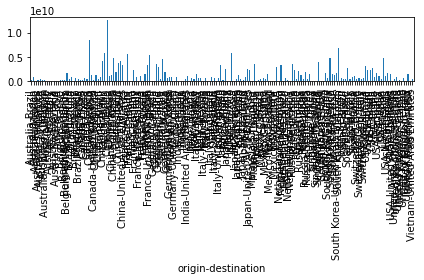

In [159]:
#CREACION DE LA FIGURA
#LIBRERIAS PARA GRAFICAR
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df1.plot(kind="bar")
plt.tight_layout()

### Opción 2

In [148]:
# 02
import csv
#definir lista vacia para agregar los valores
df2 = pd.read_csv('synergy_logistics_Rutas.csv')
df2

,Unnamed: 0,direction,origin,destination,year,product,transport_mode,total_value,origin-destination
0,0,Exports,Japan,China,2015,Cars,Sea,33000000,Japan-China
1,1,Exports,Japan,China,2015,Cars,Sea,16000000,Japan-China
2,2,Exports,Japan,China,2015,Cars,Sea,29000000,Japan-China
3,3,Exports,Japan,China,2015,Cars,Sea,14000000,Japan-China
4,4,Exports,Japan,China,2015,Cars,Sea,17000000,Japan-China
...,...,...,...,...,...,...,...,...,...
19051,19051,Imports,Japan,Singapore,2020,Gas turbines,Sea,1000000,Japan-Singapore
19052,19052,Imports,Malaysia,Singapore,2020,Gas turbines,Sea,2000000,Malaysia-Singapore
19053,19053,Imports,Malaysia,Singapore,2020,Gas turbines,Sea,33000000,Malaysia-Singapore
19054,19054,Imports,Malaysia,Singapore,2020,Gas turbines,Sea,13000000,Malaysia-Singapore


In [174]:
# CREAR ESTRUCTURA DE LECTURA
# RECORRER DF E IMPRIMIR POR TIPO DE TRANSPORTE
FromTo = {}
for index, row in df2.iterrows():
    if row["transport_mode"] in FromTo:
        FromTo[row["transport_mode"]] = FromTo.get(row["transport_mode"]) + row["total_value"]
    else:
        FromTo[row["transport_mode"]] = row["total_value"]

print(FromTo)

{'Sea': 100530622000, 'Air': 38262147000, 'Rail': 43628043000, 'Road': 33270486000}


In [176]:
#GROUP BY
print(df2.groupby(['transport_mode'])['total_value'].sum())
df3 = df2.groupby(['transport_mode'])['total_value'].sum()

transport_mode
Air      38262147000
Rail     43628043000
Road     33270486000
Sea     100530622000
Name: total_value, dtype: int64


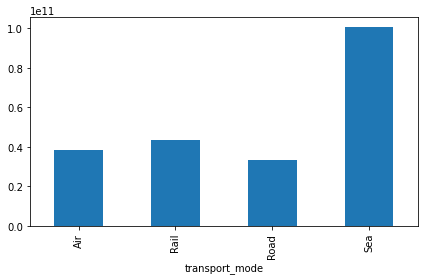

In [178]:
#GRAFICA DE TRANSPORTE
df3.plot(kind="bar")
plt.tight_layout()

### OPCIÓN 3

In [1]:
#CREAR GROUP BY PARA ORIGEN POR PAIS
df4=df.groupby(['origin'])['total_value'].sum()

NameError: name 'df' is not defined

In [208]:
#LEER CSV
totales = []
with open("synergy_logistics_Rutas.csv","r") as archivo_csv:
    lector = csv.reader(archivo_csv)
#ITERAR LOS DATOS
    for linea in lector:
        if linea[7] == "total_value":
#EXCLUIR TITULO DE CABECERA
            continue
        totales.append(int(linea[7]))
#IMPRIMIR EL TOTAL DE VENTA Y EL TOTAL POR PAIS
print("El total de las exp es:", sum(totales))
print(df4)

El total de las exp es: 215691298000
origin
Australia                2570000000
Austria                     1155000
Belgium                  2588000000
Brazil                   2763000000
Canada                  11253000000
China                   45210046000
France                  19930332000
Germany                 15593233000
India                    2626000000
Italy                    6634684000
Japan                   20042976000
Malaysia                 3560000000
Mexico                   6040755000
Netherlands              4120369000
Russia                  14074000000
Singapore                4017684000
South Korea             18510146000
Spain                    6419000000
Switzerland              2154000000
USA                     23646306000
United Arab Emirates      371000000
United Kingdom           3025612000
Vietnam                   540000000
Name: total_value, dtype: int64


In [220]:
#CREAR GROUP BY PARA OBTENER % PARTICIPACIÓN
df5=df.groupby(['origin'])['total_value'].sum()/sum(totales)
df5

origin
Australia               0.011915
Austria                 0.000005
Belgium                 0.011999
Brazil                  0.012810
Canada                  0.052172
China                   0.209605
France                  0.092402
Germany                 0.072294
India                   0.012175
Italy                   0.030760
Japan                   0.092924
Malaysia                0.016505
Mexico                  0.028006
Netherlands             0.019103
Russia                  0.065251
Singapore               0.018627
South Korea             0.085818
Spain                   0.029760
Switzerland             0.009986
USA                     0.109630
United Arab Emirates    0.001720
United Kingdom          0.014028
Vietnam                 0.002504
Name: total_value, dtype: float64

In [245]:
#IMPRIME paRTICIPACION
df6 = df5.sort_values()
#CREA NUEVO DF
df6.to_csv('synergy_logistics_origen_total_value.csv')
#NOMBRAR COLUMNAS
df6 = pd.read_csv('synergy_logistics_origen_total_value.csv')
df6.rename(columns={'origin': 'Pais', '': 'total_value'}, inplace=True)
df6.sort_values('total_value',ascending=False)

,Pais,total_value
22,China,0.209605
21,USA,0.109630
20,Japan,0.092924
19,France,0.092402
18,South Korea,0.085818
17,Germany,0.072294
16,Russia,0.065251
15,Canada,0.052172
14,Italy,0.030760
13,Spain,0.029760


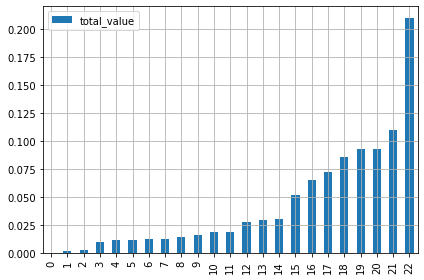

In [267]:

df6.plot(kind="bar")

plt.tight_layout()
plt.grid(True)
plt.legend()
